In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

## Zadanie 1 Sumowanie liczb pojedynczej precyzji

#### 1. Napisz program, który oblicza sumę N liczb pojedynczej precyzjiprzechowywanych w tablicy o N = 107 elementach. Tablica wypełniona jest tą samą wartością v z przedziału [0.1, 0.9] np. v = 0.53125.

In [2]:
n = 10 ** 7
v = np.float32(0.53125)
exact_sum = 5312500
arr = [v for _ in range(n)]

print("v =", v, np.dtype(v))

v = 0.53125 float32


In [3]:
def naive_sum(t, _sum, p, q):
    for i in range(p, q):
        _sum += t[i]

    return _sum

_naive_sum = naive_sum(arr, np.float32(0), 0, n)
print("Uzyskana suma: ", _naive_sum, np.dtype(_naive_sum))

Uzyskana suma:  5030840.5 float32


#### 2. Wyznacz bezwzględny i względny błąd obliczeń. Dlaczego błąd względny jest tak duży?

In [4]:
print("Błąd bezwzględny: ", abs(_naive_sum - exact_sum))
print("Błąd względny: ", round(abs((_naive_sum - exact_sum) / exact_sum) * 100, 4), "%")

Błąd bezwzględny:  281659.5
Błąd względny:  5.3018 %


Błąd względny jest tak duży, ponieważ sumując liczby o pojedyńczej precyzji w sposób naiwny, w pewnym momencie wartość sumy jest na tyle duża, że dodając do niej kolejną stosunkowo niedużą wartość v tracimy precyzję, czyli liczba jest zaokrąglana w górę lub w dół. Jeśli taką operację sumowania z błędem wykonamy wielokrotnie to w efekcie uzyskamy duży błąd względny.

#### 3. W jaki sposób rośnie błąd względny w trakcie sumowania? Przedstaw wykres (raportuj wartość błędu co 25000 kroków) i dokonaj jego interpretacji.

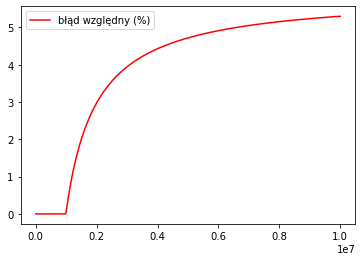

In [5]:
current_sum = np.float32(0)
current_exact_sum = 0
x = np.arange(0, 10**7 + 1, 25000)
y1 = [0]
y2 = [0]

for i in range(0, n, 25000):
    current_sum = naive_sum(arr, current_sum, i, i + 25000)
    current_exact_sum += 13281.25
    y1.append(abs((current_sum - current_exact_sum) / current_exact_sum) * 100)
    y2.append(current_exact_sum - current_sum)

plt.plot(x, y1, color='r', label='błąd względny (%)')
plt.legend()
plt.show()

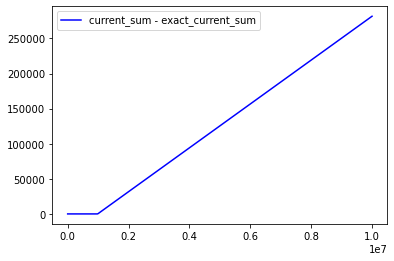

In [6]:
plt.plot(x, y2, color='b', label='current_sum - exact_current_sum')
plt.legend()
plt.show()

Jak widać na drugim wykresie różnica pomiędzy dokładną wartością sumy, a wartością obliczoną przez naiwny algorytm sumowania od pewnego momentu zwiększa się liniowo. Błąd względny jest wartością bezwzględną tej różnicy podzieloną przez dokładną wartość sumy. Dokładna wartość sumy również rośnie liniowo, zatem wykres błędu względnego (od momentu gdy błąd ten przestaje być równy zero) powinien przypominać pewną część wykresu funkcji homograficznej, co potwierdza pierwszy wykres.

#### 4. Zaimplementuj rekurencyjny algorytm sumowania.

In [7]:
def recursive_sum(t, p, q):
    if p == q:
        return t[p]

    if p + 1 == q:
        return t[p] + t[q]

    m = (p + q) // 2
    return recursive_sum(t, p, m) + recursive_sum(t, m + 1, q)

_recursive_sum = recursive_sum(arr, 0, n - 1)
print("Uzyskana suma: ", np.dtype(_recursive_sum), _recursive_sum)

Uzyskana suma:  float32 5312500.0


#### 5. Wyznacz bezwzględny i względny błąd obliczeń. Dlaczego błąd względny znacznie zmalał?

In [8]:
print("Błąd bezwzględny: ", abs(_recursive_sum - exact_sum))
print("Błąd względny: ", round(abs((_recursive_sum - exact_sum) / exact_sum) * 100, 10), "%")

Błąd bezwzględny:  0.0
Błąd względny:  0.0 %


Błąd względny znacznie zmalał, ponieważ sumująć rekurencyjnie dodajemy do siebie wartości zmiennoprzecinkowe równe lub bardzo zbliżone, dlatego utrata precyzji jest znacznie mniejsz w stosunku do przypadku, gdy dodajemy do siebie liczby o dużej różnicy.

#### 6. Porównaj czas działania obu algorytmów dla tych samych danych wejściowych.

In [9]:
start = time()
naive_sum(arr, np.float32(0), 0, n)
print("Algorytm naiwny: ", time() - start, "sekund")
start = time()
recursive_sum(arr, 0, n - 1)
print("Algorytm rekurencyjny: ", time() - start, "sekund")

Algorytm naiwny:  1.0841572284698486 sekund
Algorytm rekurencyjny:  3.658159017562866 sekund


Algorytm rekurencyjny dla opisywanych danych jest około 2,5 razy wolniejszy od algorytmu naiwnego.

#### 7. Przedstaw przykładowe dane wejściowe, dla których algorytm sumowania rekurencyjnego zwraca niezerowy błąd.

In [10]:
w = np.float32(0.53125125)
arr2 = [w for _ in range(n)]
recursive_sum_arr2 = recursive_sum(arr2, 0, n - 1)
exact_sum_arr2 = 5312512.5

print("w =", w, np.dtype(w))
print("Uzyskana suma: ", recursive_sum_arr2, np.dtype(recursive_sum_arr2))
print("Błąd bezwzględny: ", abs(recursive_sum_arr2 - exact_sum_arr2))
print("Błąd względny: ", round(abs((recursive_sum_arr2 - exact_sum_arr2) / exact_sum_arr2) * 100, 10), "%")

w = 0.53125125 float32
Uzyskana suma:  5312513.0 float32
Błąd bezwzględny:  0.5
Błąd względny:  9.4117e-06 %


## Zadanie 2 Algorytm Kahana

In [11]:
def kahan_sum(tab):
    _sum = np.float32(0)
    _err = np.float32(0)
    for i in range(len(tab)):
        y = tab[i] - _err
        temp = _sum + y
        _err = (temp - _sum) - y
        _sum = temp

    return _sum

#### 1. Wyznacz bezwzględny i względny błąd obliczeń dla tych samych danych wejściowych jak w przypadku testów z Zadania 1.

In [12]:
n = 10 ** 7

v = np.float32(0.53125)
arr1 = [v for _ in range(n)]
exact_sum_v = 5312500

w = np.float32(0.53125125)
arr2 = [w for _ in range(n)]
exact_sum_w = 5312512.5

In [13]:
kahan_sum_v = kahan_sum(arr1)
kahan_sum_w = kahan_sum(arr2)

for s, e in [(kahan_sum_v, exact_sum_v), (kahan_sum_w, exact_sum_w)]:
    print("Uzyskana suma: ", s, np.dtype(s))
    print("Błąd bezwzględny: ", abs(s - e))
    print("Błąd względny: ", round(abs((s - e) / e) * 100, 10), "%\n")

Uzyskana suma:  5312500.0 float32
Błąd bezwzględny:  0.0
Błąd względny:  0.0 %

Uzyskana suma:  5312512.5 float32
Błąd bezwzględny:  0.0
Błąd względny:  0.0 %



#### 2. Wyjaśnij dlaczego w algorytm Kahana ma znacznie lepsze własności numeryczne? Do czego służy zmienna err?

Gdy obliczamy wartość temp = _sum + y, w większości przypadków _sum jest znacnie większe od y zatem najmłodsze bity y mogą zostać utracone. Zmienną err odliczamy jako err = (temp - _sum) - y, wydaje się że (temp - _sum) powinno być równe y, ale z powodu utraty precyzji zawiera tylko strasze bity, więc tak naprawdę różnica (temp - _sum) - y oblicza nam błąd na najmłodszych bitach. Błąd ten jest przenoszony do następnej iteracji i odejmowany nie od sumy tylko od następnego wyrazu z sumowanej tablicy, a ponieważ elementy tablicy zazwyczaj będą znacznie mniejsze niż _sum to utrata precyzji będzie znacznie mniejsza.

#### 3. Porównaj czasy działania algorytmu Kahana oraz algorytmu sumowania rekurencyjnego dla tych samych danych wejściowych.

In [14]:
start = time()
recursive_sum(arr1, 0, n - 1)
print("Algorytm rekurencyjny: ", time() - start, "sekund")
start = time()
kahan_sum(arr1)
print("Algorytm kahan: ", time() - start, "sekund")

Algorytm rekurencyjny:  3.8028323650360107 sekund
Algorytm kahan:  4.022246360778809 sekund


Algorytm rekurencyjny i kahana mają podobny czas działania, zatem biorąc pod uwagę, że kahan zużywa mniej dodatkowej pamięci (rekurencyjny wymaga stosu) oraz że dla $w = 0.53125125$ algorytm kahana podał wynik bez błędu w przeciwieństwie do rekurencyjnego, to możemy wnioskować, że jest to lepszy algorytm, jeśli chodzi o sumowanie wielu takich samych liczb.

## Zadanie 3 Sumy częściowe

#### Rozważ sumy częściowe szeregu definiującego funkcję dzeta Riemanna
#### $$ζ(s) = \sum_{k=1}^{n} \dfrac{1}{k^s}$$
#### oraz funkcję eta Dirichleta
#### $$η(s) = \sum_{k=1}^{n} (-1)^{k-1} \dfrac{1}{k^s}$$
#### Dla $s = 2, 3.6667, 5, 7.2, 10$ oraz $n = 50, 100, 200, 500, 1000$ oblicz wartości funkcji $ζ(s)$ i $η(s)$ w pojedynczej precyzji sumując w przód, a następnie wstecz. Porównaj wyniki z rezultatami uzyskanymi dla podwójnej precyzji. Dokonaj interpretacji otrzymanych wyników.

In [15]:
data = [(2, 50), (3.6667, 100), (5, 200), (7.2, 500), (10, 1000)]

for d in data:
    s, n = d
    s_float32 = np.float32(s)

    print("\n\n" + "#" * 64)
    print("s =", s, "; n =", n)

    dzeta_forward = 0.0
    eta_forward = 0.0

    dzeta_backward = 0.0
    eta_backward = 0.0

    dzeta_forward_float32 = np.float32(0.0)
    eta_forward_float32 = np.float32(0.0)

    dzeta_backward_float32 = np.float32(0.0)
    eta_backward_float32 = np.float32(0.0)

    # w przód
    for k in range(1, n + 1):
        dzeta_forward += 1 / (k ** s)
        dzeta_forward_float32 += np.float32(1 / np.float32(k ** s))

        eta_forward += (-1) ** (k - 1) / k ** s
        eta_forward_float32 += np.float32((-1) ** (k - 1) / np.float32(k ** s))

    # wstecz
    for k in range(n, 0, -1):
        dzeta_backward += 1 / (k ** s)
        dzeta_backward_float32 += np.float32(1 / np.float32(k ** s))

        eta_backward += (-1) ** (k - 1) / k ** s
        eta_backward_float32 += np.float32((-1) ** (k - 1) / np.float32(k ** s))

    print("float64 - dzeta w przód: ", dzeta_forward)
    print("float64 - eta w przód: ", eta_forward)
    print("float64 - dzeta wstecz: ", dzeta_backward)
    print("float64 - eta wstecz:", eta_backward)
    print("float64 - dzeta różnica w przód/wstecz: ", abs(dzeta_forward - dzeta_backward))
    print("float64 - eta różnica w przód/wstecz: ", abs(eta_forward - eta_backward))

    print("\nfloat32 - dzeta w przód: ", dzeta_forward_float32)
    print("float32 - eta w przód: ", eta_forward_float32)
    print("float32 - dzeta wstecz: ", dzeta_backward_float32)
    print("float32 - eta wstecz:", eta_backward_float32)
    print("float32 - dzeta różnica w przód/wstecz: ", abs(dzeta_forward_float32 - dzeta_backward_float32))
    print("float32 - eta różnica w przód/wstecz: ", abs(eta_forward_float32 - eta_backward_float32))

    print("\ndzeta w przód - różnica float32/float64: ", abs(dzeta_forward - dzeta_forward_float32))
    print("eta w przód - różnica float32/float64: ", abs(eta_forward - eta_forward_float32))
    print("dzeta wstecz - różnica float32/float64: ", abs(dzeta_backward - dzeta_backward_float32))
    print("eta wstecz - różnica float32/float64: ", abs(eta_backward - eta_backward_float32))



################################################################
s = 2 ; n = 50
float64 - dzeta w przód:  1.625132733621529
float64 - eta w przód:  0.8222710318260295
float64 - dzeta wstecz:  1.6251327336215293
float64 - eta wstecz: 0.8222710318260289
float64 - dzeta różnica w przód/wstecz:  2.220446049250313e-16
float64 - eta różnica w przód/wstecz:  5.551115123125783e-16

float32 - dzeta w przód:  1.6251329
float32 - eta w przód:  0.822271
float32 - dzeta wstecz:  1.6251327
float32 - eta wstecz: 0.82227105
float32 - dzeta różnica w przód/wstecz:  2.3841858e-07
float32 - eta różnica w przód/wstecz:  5.9604645e-08

dzeta w przód - różnica float32/float64:  1.8473632001914098e-07
eta w przód - różnica float32/float64:  4.240799966748199e-08
dzeta wstecz - różnica float32/float64:  5.368225930446613e-08
eta wstecz - różnica float32/float64:  1.719664566302015e-08


################################################################
s = 3.6667 ; n = 100
float64 - dzeta w przód:  1.10940879

Oszacowanie błędów względnych:
$$fl(x + y) = (x + y)(1 + err_1) = x + y + xerr_1 + yerr_1$$
$$fl(fl(x + y) + z) = (x + y + xerr_1 + yerr_1 + z)(1 + err_2) \approx x + y + z + (x + y)err_1 + (x + y + z)err_2$$
Obliczamy teraz błąd względny wyrażenia $fl(fl(x + y) + z)$:
$$\frac{|fl(fl(x + y) + z) - (x + y + z)|}{x + y + z} \approx \frac{|(x + y)err_1 + (x + y + z)err_2|}{x + y + z}$$

Analogicznie możemy obliczyć że błąd względny wyrażenia $fl(x + fl(y + z))$ będzie wynosił:
$$\frac{|fl(x + fl(y + z)) - (x + y + z)|}{x + y + z} \approx \frac{|(y + z)err_1 + (x + y + z)err_2|}{x + y + z}$$
Zatem w obu przypadkach błąd względny zależy od $(x + y + z)err_2$, natomiast człon przy $err_1$ jest różny i wynosi $x + y$ lub $y + z$ w zależności od kolejności sumowania zatem jeśli |x + y| < |y + z| to potencjalnie lepiej jest sumować w sposób pierwszy, czyli tak by najpierw dodać do siebie wartości, które mają na moduł mniejszą sumę.

Wnioski:
- W przypadku sumowania liczb zmiennoprzecinowych kolejność sumowania ma wpływ na jego wynik. Ponieważ dla funkcji dzeta oraz eta sumujemy coraz mniejsze liczby, z powyższej analizy oszacowania błędów względnych wynika, że sensowniej jest sumować od tyłu.
- Dla rozważanych danych, różnica pomiędzy wynikami sumowania w przód/wstecz dla pojedyńczej precyzji jest rzędu $10^{-7}$ lub $10^{-8}$, natomiast dla podwójnej precyzji rzędu $10^{-15}$ lub $10^{-16}$.
- Różnica pomiędzy pojedyńczą, a podwójną precyzją jest najczęściej rzędu $10^{-8}$. Jest to sensowny wynik ponieważ dla wartości z zakresu (0, 1) float32 jest w stanie przechować około 8 cyfr po przecinku.
- W przypadku sumowania dla funkcji eta można by najpierw zsumować ze sobą sąsiednie wyrazy sumy, które mają podobną wartość na moduł, ale przeciwny znak. W ten sposób moglibyśmy zwiększyć precyzję wyniku na podobnej zasadzie jak w sumowaniu rekurencyjnym.

## Zadanie 4 Błędy zaokrągleń i odwzorowanie logistyczne

#### Rozważ odwzorowanie logistyczne dane następującym wzorem rekurencyjnym: $$x_{n+1}= rx_n(1 − x_n)$$
#### Przy czym $0 \leq x_n \leq 1$ i $r > 0$. Zbadaj zbieżność procesu iteracyjnego określonego tym równaniem w zależności od wartości parametru $r$ oraz $x_0$

#### a) Dla różnych wartości $r$ $(1 \leq r \leq 4)$ oraz kilku wybranych wartości $x_0$ przedstaw na wykresie wartości $x_n$ uzyskane po wielu iteracjach odwzorowania logistycznego (diagram bifurkacyjny). Dokonaj interpretacji otrzymanych wyników.


In [16]:
def logistic(x, r):
    return r * x * (1 - x)

def logistic_float32(x, r):
    return r * x * (np.float32(1) - x)

In [17]:
def bifurcation_diagram(x_0, min_r, max_r, n, iterations, last, np_type, alpha_value=.05):
    r = np.linspace(min_r, max_r, n, dtype=np_type)
    x_n = np.full(n, x_0, dtype=np_type)

    for _ in range(iterations - last):
        x_n = logistic(x_n, r)

    for _ in range(last):
        x_n = logistic(x_n, r)
        plt.plot(r, x_n, ',k', alpha=alpha_value)

    plt.xlabel('r')
    plt.ylabel('x')
    plt.xlim(min_r, max_r)
    plt.ylim(0, 1)
    plt.title('Diagram bifurkacyjny:\n {0} <= r <= {1}\n x_0 = {2}\n na wykresie zaznaczono {3} ostatnich iteracji z {4}'.format(min_r, max_r, x_0, last, iterations))
    plt.show()

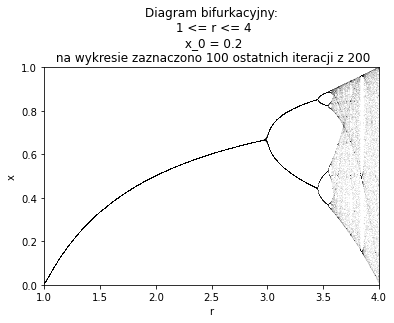

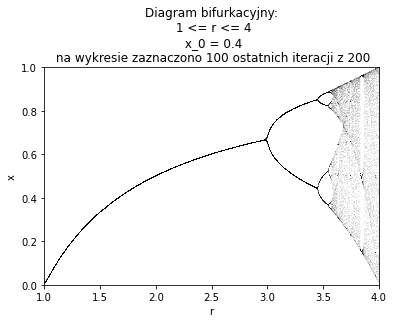

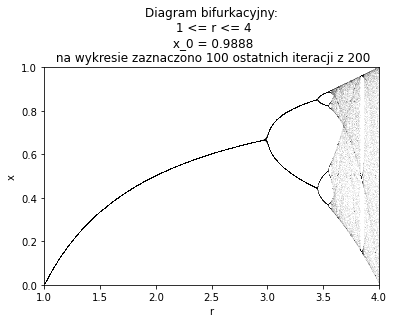

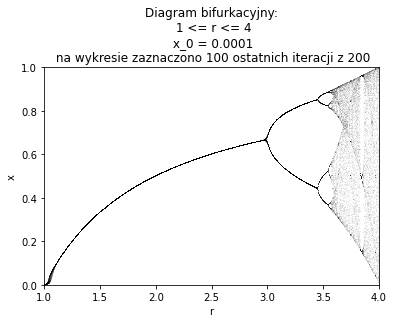

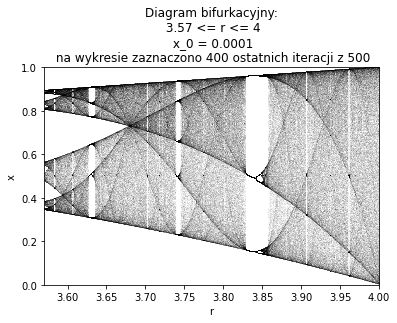

In [18]:
bifurcation_diagram(0.2, 1, 4, 1000, 200, 100, np.float64)
bifurcation_diagram(0.4, 1, 4, 1000, 200, 100, np.float64)
bifurcation_diagram(0.9888, 1, 4, 1000, 200, 100, np.float64)
bifurcation_diagram(0.0001, 1, 4, 1000, 200, 100, np.float64)
bifurcation_diagram(0.0001, 3.57, 4, 1000, 500, 400, np.float64)

Niezależnie od wartości początkowej $x_0$ otrzymywane wykresy wyglądają bardzo podobnie. Może to sugerować, że wartość $x_n$ w granicy nie zależy od wartości początkowej, a jedynie od wartości $r$. Dla $r$ z przedziału $<0, 3>$ obserwujemy szybką zbieżność do jednej wartości następnie pomiędzy 3 a ~3.57 widzimy osylacje pomiędzy 2, następnie 4 itd. wartościami. Od wartości ~3.57 odwzorowanie zachowuję się chaotycznie, przyjmuje bardzo wiele różnych wartości. Ciekawe są natomiast pionowe paski pojawiające się na diagramie np. dla $r$ ~3.84. Dla tych wartości $r$ odwzorowanie znowu wydaje się przyjmować w granicy tylko kilka wartości.

#### b) Dla tych samych wartości $x_0$ oraz $r$ $(3.75 \leq r \leq 3.8)$ porównaj trajektorie obliczone z użyciem pojedynczej i podwójnej precyzji. Wyjaśnij otrzymane wyniki.

In [19]:
def trajectories_float32_float64(x_0, r, n):
    r_float32 = np.float32(r)
    r_float64 = np.float64(r)
    x_float32 = np.float32(x_0)
    x_float64 = np.float64(x_0)

    iterations = np.arange(0, n + 1)
    x_n_float32 = [x_float32]
    x_n_float64 = [x_float64]

    for _ in range(n):
        x_float32 = logistic_float32(x_float32, r_float32)
        x_float64 = logistic(x_float64, r_float64)
        x_n_float32.append(x_float32)
        x_n_float64.append(x_float64)

    plt.plot(iterations, x_n_float32, marker='.', color='r', label='float32')
    plt.plot(iterations, x_n_float64, marker='.', color='g', label='float64')

    plt.xlabel('iteracja')
    plt.ylabel('x')
    plt.xlim(0, n)
    plt.legend(loc='lower left')
    plt.title('Trajektorie:\nr = {0} \nx_0 = {1}'.format(r, x_0))
    plt.show()

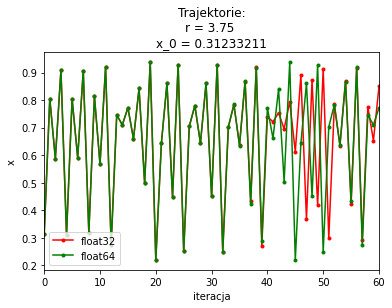

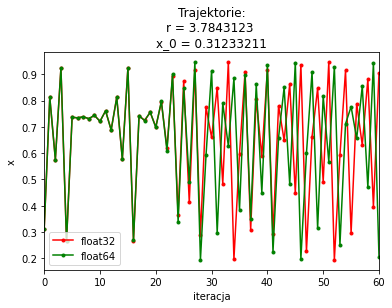

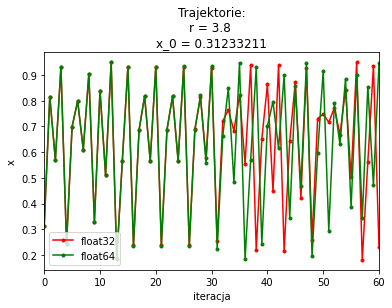

In [20]:
trajectories_float32_float64(0.31233211, 3.75, 60)
trajectories_float32_float64(0.31233211, 3.7843123, 60)
trajectories_float32_float64(0.31233211, 3.8, 60)

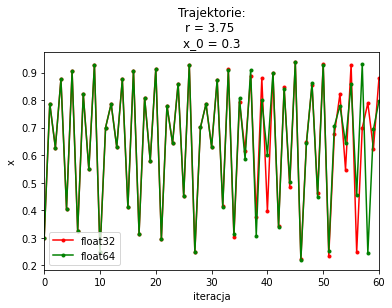

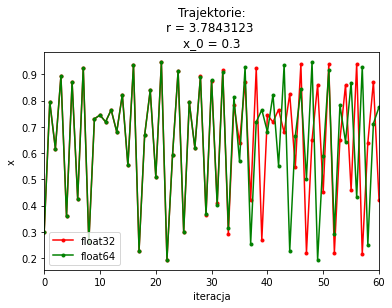

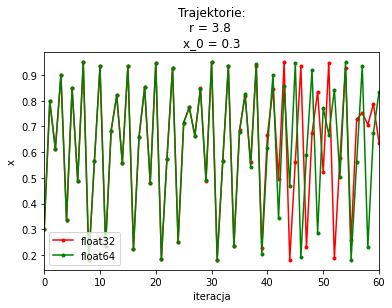

In [21]:
trajectories_float32_float64(0.3, 3.75, 60)
trajectories_float32_float64(0.3, 3.7843123, 60)
trajectories_float32_float64(0.3, 3.8, 60)

Z powodu utraty precyzji po pewnej liczbie iteracji wartość odwzorowania różni się w zależności od zastosowanej precyzji. Wartości $x_0$ i $r$ ma wpływ na to jak szybko wartości float32 i float64 zaczynają od siebie odbiegać. Gdy wartści te są dokładniejsze (mają więcej cyfr po przecinku w zapisie dziesiętnym) to wartość odwzorowania szybciej (po mniejszej liczbie iteracji) zaczyna się różnić w zależności od zastosowanej precyzji. W przedstawionych przypadkach różnica ta wynosi około 10-15 iteracji, np. dla $r = 3.8$ i $x_0 = 0.3$ widać znaczącą różnice dopiero po 40 iteracjach, natomiast dla $r = 0.31233211$ i $x_0 = 3.7843123$ wykresy odbiegają od siebie już po 25 iteracjach.

#### Dla $r = 4$ i różnych wartości $x_0$ wyznacz (pojedyncza precyzja) liczbę iteracji potrzebnych do osiągnięcia zera. Przedstaw interpretację rezultatów.

In [22]:
def iterations_to_zero(x_0, iterations_limit, r=np.float32(4)):
    x = np.array(x_0)
    iterations = np.full(x.shape[0], 0)
    zeros = np.full(x.shape[0], False)

    for i in range(iterations_limit):
        x = logistic(x, r)
        temp = (x == np.float32(0))
        iterations[zeros != temp] = i
        zeros = temp

    plt.plot(x_0[iterations != 0], iterations[iterations != 0], '.r')
    plt.xlabel('x_0')
    plt.ylabel('iteracje po których osiągnięto 0')
    plt.show()

    count = iterations[iterations != 0].shape[0]
    print("Osiągnęły zero: ", count)
    print("Nie osiągnęły zera: ", x.shape[0] - count)

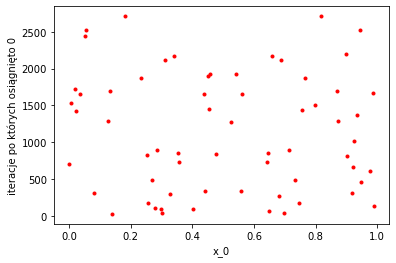

Osiągnęły zero:  63
Nie osiągnęły zera:  237


In [23]:
iterations_to_zero(np.linspace(0.001, 0.999, 300, dtype=np.float32), 1000000)

Przykład ten pokazuje, że w wyniku zjawiska underflow odwzorowanie reprezentowane przy pomocy liczb zmiennoprzecinkowych może osiągnąć wartość zero, mimo że w teorii odwzorowanie to dla $x_0 \neq 0$ przyjmuje zawsze wartości $> 0$. Dla przedstawionych danych, po około 27000 aż 63 z 300 wartości początkowych zbiegły do 0.